In [7]:
%matplotlib inline
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

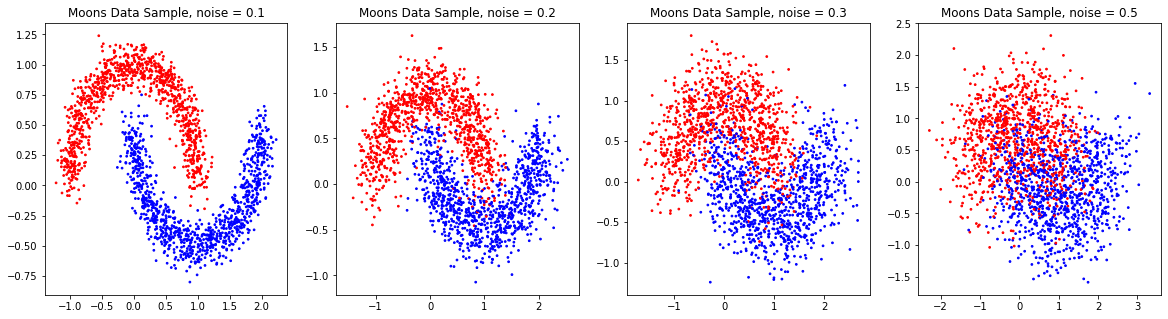

In [26]:
fig, axarr = plt.subplots(1, 4,  figsize = (20,5))
noises = [0.1,0.2,0.3,0.5]

# visualize some data
for i in range(0,4):
    data = datasets.make_moons(n_samples=2000, noise=noises[i])
    X,y = data
    axarr[i].set_title('Moons Data Sample, noise = {}'.format(noises[i]))
    colors = np.array(['r','b'])
    axarr[i].scatter(X[:, 0], X[:, 1], color=colors[y],s=3)